In [1]:
### fruit을 knn으로 구현하기 
import pandas as pd
fruits = pd.read_csv("../Data/fruits.csv")
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


### feature set 와 test set을 numpy로 변경

In [2]:
import numpy as np
testA = np.array([1,2,3,4])
testB= np.array([10,20,30,40])

In [3]:
# 2열의 array 묶어서 컬림기ㅏㄴ으로 하나의 array
combineA = [[i,j] for i, j in zip(testA,testB)]
print(np.array(combineA))

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]


In [4]:
comnbineB = np.column_stack((testA, testB))
print(comnbineB)

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]


In [5]:
combineC = np.row_stack((testA,testB))
print(combineC)

[[ 1  2  3  4]
 [10 20 30 40]]


In [13]:
# fruit data array로 만들기 
fruits_data = np.column_stack((fruits.length, fruits.weight))
fruits_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [10]:
fruits_target = np.array(fruits['name'])
fruits_target

array(['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'berry', 'berry', 'berry', 'berry', 'berry', 'berry', 'berry',
       'berry', 'berry', 'berry', 'berry', 'berry', 'berry', 'berry'],
      dtype=object)

In [11]:
from sklearn.model_selection import train_test_split

In [21]:
# sklearn으로 train test 분류
train_input, test_input ,train_target, test_target =train_test_split(
    fruits_data,
    fruits_target,
    stratify=fruits_target, # 비율 맞추기 
    random_state=42)

In [22]:
# knn 으로 학습
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)

KNeighborsClassifier()

In [23]:
# 정확도 출력 
kn.score(test_input,test_target)

1.0

---
# 수상한 과일?

In [26]:
kn.predict([[25,150]])

array(['berry'], dtype=object)

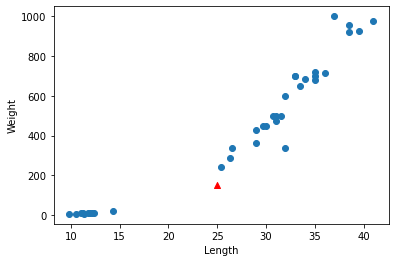

In [29]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0,],train_input[:,1])
plt.scatter(25,150,marker='^',c='red')
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

> apple 에 가까운데 berry 라니?

In [30]:
# 이웃을 출력해보자
# default = 5 
distance , indexes = kn.kneighbors([[25,150]])
print(indexes)

[[11 20 13 22 15]]


In [31]:
# 이웃에 indexes 해당하는 feature 를 출력 
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 14.3,  19.7],
        [ 12.4,  13.4],
        [ 12.2,  12.2],
        [ 26.3, 290. ]]])

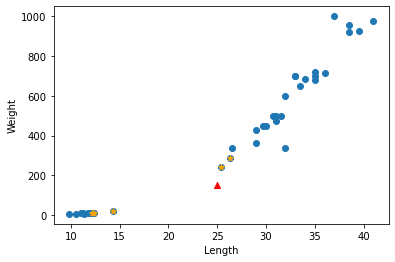

In [34]:
plt.scatter(train_input[:,0,],train_input[:,1])
plt.scatter(25,150,marker='^',c='red')
plt.scatter(
    train_input[indexes,0],
    train_input[indexes,1],
    marker='*',c='orange'
)
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [35]:
train_target[indexes]

array([['apple', 'berry', 'berry', 'berry', 'apple']], dtype=object)

---
# 기준을 맞추자

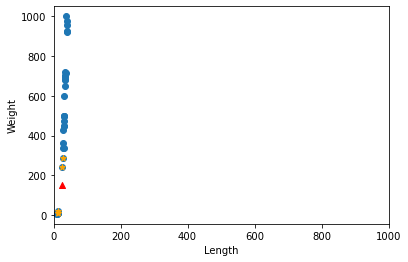

In [37]:
plt.scatter(train_input[:,0,],train_input[:,1])
plt.scatter(25,150,marker='^',c='red')
plt.scatter(
    train_input[indexes,0],
    train_input[indexes,1],
    marker='*',c='orange'
)
plt.xlabel("Length")
plt.ylabel("Weight")
# x축을 y처럼 기준 맞취 
plt.xlim(0,1000)
plt.show()

> sample이 length에는 거의 영향을 받지 않고 Weight에서 영향을 많이 받는다.

> 차트의 모양대로 현재는 berry로 생각하는 것이 맞는 거 같다.

In [38]:
# length와 weight의 평균과 표준편차를 구해서 비교해보자
mean = np.mean(train_input,axis=0)  # 열방향 평균 
std = np.std(train_input,axis=0) # 열방향

In [39]:
print(mean,std)

[ 26.93333333 441.98333333] [ 10.09141549 325.61300692]


> length와 weight의 차이가 너무 심하다

---
# train_data를 표준함수(z함수)로 변경하자
표준점수 = (feature - 평균) / 표준편차

In [41]:
train_scales = (train_input - mean) / std
train_scales

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137],
       [ 1.14618873,  1.46805151],
       [-1.49962444, -1.32698425],
       [ 0.50207691,  0.48528979],
       [-1.47980562, -1.32729137],
       [ 0.89845341,  0.83539865],
       [ 0.60117103,  0.79240283],
       [-0.15194433, -0.61417489],
       [ 0.99754754,  1.71374194],
       [-1.44016797, -1.3162353 ],
       [-1.69781269, -1.33681187],
       [-0.06275961, -0.46676063],
       [ 0.79935928,  0.73098022],
       [ 0.40298278,  0.17817675],
       [-1.57889974, -1.32759848],
       [ 0.27416042,  0.02462023],
       [-1.25188913, -1.29688718],
       [ 0.79935928,  0.79240283],
       [-1.45998679, -1.31992065],
       [ 0.45252984,  0.17817675],
       [ 1.39392404,  1.63696368],
       [ 0.6507181 ,  0.63884631],
       [ 0.60117103,  0.79240283],
       [-1.62844681, -1.33435497],
       [-0.04294079,

In [42]:
# sklearn 을 이용한 방법
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_input)
train_scales2 = scaler.transform(train_input)
train_scales2[0:5]

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137]])

### 전처리 데이터로 모델 훈련하기

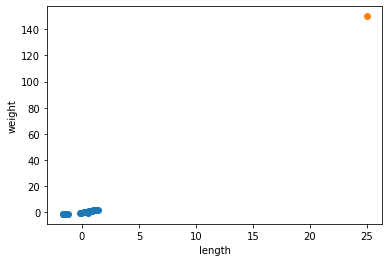

In [45]:
plt.scatter(train_scales2[:,0],train_scales2[:,1])
plt.scatter(25,150)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

> 예측한 데이터로 표준점수로 변경이 필요

In [46]:
new = ([25,150] - mean) / std
new

array([-0.19158198, -0.89671889])

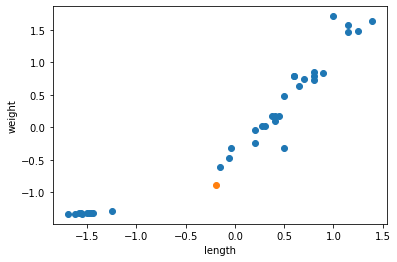

In [47]:
plt.scatter(train_scales2[:,0],train_scales2[:,1])
plt.scatter(new[0],new[1])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### KNN으로 분류

In [49]:
kn.fit(train_scales2, train_target)

KNeighborsClassifier()

In [51]:
# 검증 데이터도 표준점수로 변경 
# (*** 중요: 평균과 표준편차를 train set에서 구한 값으로 사용한다.)
# mean,std 훈련데이터에서 구한것 
test_scaled = (test_input - mean) /std

In [52]:
# 정확도 확인 
kn.score(test_scaled,test_target)

1.0

In [53]:
# 수상한 과일을 다시 확인
print(kn.predict([new]))

['apple']


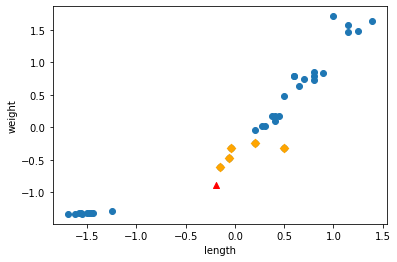

In [55]:
# 확인을 위해 이웃을 출력하자
distance, indexes = kn.kneighbors([new])

plt.scatter(train_scales2[:,0],train_scales2[:,1])
plt.scatter(new[0],new[1],marker="^",c="red")
plt.scatter(train_scales[indexes,0],train_scales[indexes,1],marker="D",c="orange")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()